In [0]:
#If you use Google Colab
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# reading the dataSet
df = pd.read_csv("/content/drive/My Drive/stage E3/CIDDS-001-internal-week1.csv")
df = df.drop(["attackType","attackID","attackDescription","Flows","Tos","Src IP Addr","Dst IP Addr"],axis=1)
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date first seen,Duration,Proto,Src Pt,Dst Pt,Packets,Bytes,Flags,class
0,2017-03-15 00:01:16.632,0.000,TCP,445,58844.0,1,108,.AP...,normal
1,2017-03-15 00:01:16.552,0.000,TCP,445,48888.0,1,108,.AP...,normal
2,2017-03-15 00:01:16.551,0.004,TCP,48888,445.0,2,174,.AP...,normal
3,2017-03-15 00:01:16.631,0.004,TCP,58844,445.0,2,174,.AP...,normal
4,2017-03-15 00:01:16.552,0.000,TCP,445,48888.0,1,108,.AP...,normal


In [0]:
#We need to convert the Bytes column because it is write 4.5M and not 4 500 000

df['Bytes']=df['Bytes'].astype(str)
df['find']=df['Bytes'].str.find("M")
df.loc[df['find']!=-1,'Bytes']=df['Bytes'].str.slice(stop=-1)
df.loc[df['find']==-1,'Bytes']=df['Bytes']
df['Bytes']=df['Bytes'].astype(float)
df.loc[df['find']!=-1,'Bytes']=df['Bytes'].mul(1000000)
df=df.drop('find',axis=1)
df.head()

,Date first seen,Duration,Proto,Src Pt,Dst Pt,Packets,Bytes,Flags,class
0,2017-03-15 00:01:16.632,0.000,TCP,445,58844.0,1,108.0,.AP...,normal
1,2017-03-15 00:01:16.552,0.000,TCP,445,48888.0,1,108.0,.AP...,normal
2,2017-03-15 00:01:16.551,0.004,TCP,48888,445.0,2,174.0,.AP...,normal
3,2017-03-15 00:01:16.631,0.004,TCP,58844,445.0,2,174.0,.AP...,normal
4,2017-03-15 00:01:16.552,0.000,TCP,445,48888.0,1,108.0,.AP...,normal


In [0]:
#optional
#We put the "Date first seen" as the X-axis on the dataset

df['Date'] = pd.to_datetime(df['Date first seen'])
df = df.set_index('Date')
df.drop(['Date first seen'], axis=1, inplace=True)
df.head()

,Duration,Proto,Src Pt,Dst Pt,Packets,Bytes,Flags,class
Date,,,,,,,,
2017-03-15 00:01:16.632,0.000,TCP,445,58844.0,1,108.0,.AP...,normal
2017-03-15 00:01:16.552,0.000,TCP,445,48888.0,1,108.0,.AP...,normal
2017-03-15 00:01:16.551,0.004,TCP,48888,445.0,2,174.0,.AP...,normal
2017-03-15 00:01:16.631,0.004,TCP,58844,445.0,2,174.0,.AP...,normal
2017-03-15 00:01:16.552,0.000,TCP,445,48888.0,1,108.0,.AP...,normal


nombre de données : 8451520

répartition des valeurs : 
normal      7010897
attacker     746230
victim       694393
Name: class, dtype: int64



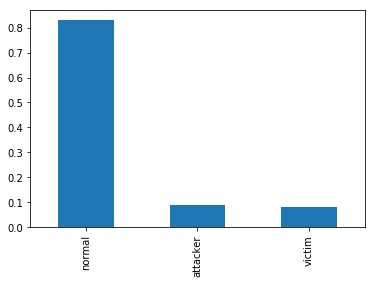

In [0]:
n=df.shape[0]
print("number of rows : "+str(n))
resultat=df['class'].value_counts()
print("\nvalue repartition for class : \n"+str(resultat)+"\n")
resultat=resultat
resultat.plot(kind='bar')

In [0]:
#function to remove some data who are in a certain class
def supprDataAlea(df,clas,nom,frac):
  sus=df.loc[df[clas] == nom]
  sus=sus.sample(frac=frac)
  if frac!=0.0:
    return df.drop(index=sus.index)
  return df

In [0]:
#suppress data to gain speed
#df=supprDataAlea(df,'class','normal',0.95)
#df=supprDataAlea(df,'class','attacker',0.45)
#df=supprDataAlea(df,'class','victim',0.45)

nombre de données : 8451520

répartition des valeurs : 
normal      7010897
attacker     746230
victim       694393
Name: class, dtype: int64



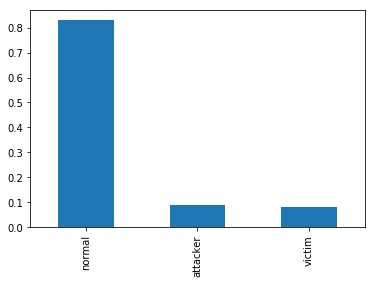

In [0]:
n=df.shape[0]
print("number of rows : "+str(n))
resultat=df['class'].value_counts()
print("\nvalue repartition for class : \n"+str(resultat)+"\n")
resultat=resultat
resultat.plot(kind='bar')

In [0]:
#Proto, Class and Flags become dummy variables

"""
df["Flags"]=df["Flags"].astype("category").cat.codes
df["Proto"]=df["Proto"].astype("category").cat.codes
"""

df= pd.get_dummies(df, columns=['Proto'])


df= pd.get_dummies(df, columns=['Flags'])
df= pd.get_dummies(df, columns=['class'])


df.head()

,Duration,Src Pt,Dst Pt,Packets,Bytes,Proto_ICMP,Proto_IGMP,Proto_TCP,Proto_UDP,Flags_......,Flags_....S.,Flags_...R..,Flags_...RS.,Flags_.A....,Flags_.A...F,Flags_.A..S.,Flags_.A..SF,Flags_.A.R..,Flags_.A.R.F,Flags_.A.RS.,Flags_.A.RSF,Flags_.AP...,Flags_.AP..F,Flags_.AP.S.,Flags_.AP.SF,Flags_.APR..,Flags_.APR.F,Flags_.APRS.,Flags_.APRSF,class_attacker,class_normal,class_victim
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-03-15 00:01:16.632,0.000,445,58844.0,1,108.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2017-03-15 00:01:16.552,0.000,445,48888.0,1,108.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2017-03-15 00:01:16.551,0.004,48888,445.0,2,174.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2017-03-15 00:01:16.631,0.004,58844,445.0,2,174.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2017-03-15 00:01:16.552,0.000,445,48888.0,1,108.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [0]:
#bug on Skope Rules because of the space in the features name

df = df.drop(["Flags_......"],axis=1)
df.rename(columns={'Dst Pt':'DstPt',
                   'Src Pt':'SrcPt',
                  'Flags_....S.':'Flags_S',
                  'Flags_...R..':'Flags_R',
                  'Flags_...RS.':'Flags_RS',
                  'Flags_.A...F':'Flags_AF',
                  'Flags_.A....':'Flags_A',
                  'Flags_.A..S.':'Flags_AS',
                  'Flags_.A..SF':'Flags_ASF',
                  'Flags_.A.R..':'Flags_AR',
                  'Flags_.A.R.F':'Flags_ARF',
                  'Flags_.A.RS.':'Flags_ARS',
                  'Flags_.A.RSF':'Flags_ARSF',
                  'Flags_.AP...':'Flags_AP',
                  'Flags_.AP..F':'Flags_APF',
                  'Flags_.AP.S.':'Flags_APS',
                  'Flags_.AP.SF':'Flags_APSF',
                  'Flags_.APR..':'Flags_APR',
                  'Flags_.APR.F':'Flags_APRF',
                  'Flags_.APRS.':'Flags_APRS',
                  'Flags_.APRSF':'Flags_APRSF',
                  'Proto_ICMP ':'ICMP',
                  'Proto_IGMP ':'IGMP',
                  'Proto_TCP  ':'TCP',
                  'Proto_UDP  ':'UDP'},inplace=True)
df.head()

,Duration,SrcPt,DstPt,Packets,Bytes,ICMP,IGMP,TCP,UDP,Flags_S,Flags_R,Flags_RS,Flags_A,Flags_AF,Flags_AS,Flags_ASF,Flags_AR,Flags_ARF,Flags_ARS,Flags_ARSF,Flags_AP,Flags_APF,Flags_APS,Flags_APSF,Flags_APR,Flags_APRF,Flags_APRS,Flags_APRSF,class_attacker,class_normal,class_victim
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-03-15 00:01:16.632,0.000,445,58844.0,1,108.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2017-03-15 00:01:16.552,0.000,445,48888.0,1,108.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2017-03-15 00:01:16.551,0.004,48888,445.0,2,174.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2017-03-15 00:01:16.631,0.004,58844,445.0,2,174.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2017-03-15 00:01:16.552,0.000,445,48888.0,1,108.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [0]:
import sklearn

df=sklearn.utils.shuffle(df)

label_names=["class_attacker","class_normal","class_victim"]
features=df.drop(label_names,axis=1).values
label=df[label_names].values

test_size=(int)(n*(1/3))

#We use all the set here as the train set to create rules
X_train=features
y_train=label

In [0]:
pip install skope-rules

     |████████████████████████████████| 2.0MB 3.6MB/s 
  Created wheel for skope-rules: filename=skope_rules-1.0.0-cp36-none-any.whl size=14591 sha256=9068cf54832ac0406c92e75f799dfcc475e03704b54edabbb58dc8639ae67df6
  Stored in directory: /root/.cache/pip/wheels/3e/8d/56/464f328ff3200c785626967ee39a6b2efc455469dab615f03e
Successfully built skope-rules


In [0]:
from skrules import SkopeRules

feature_names = df.drop(label_names,axis=1).columns.values
Rules = SkopeRules(feature_names=feature_names,precision_min=0.99)

#for each class, print the classification rules

for lab in label_names:
  for idx, species in enumerate(['non '+lab,lab]):
      Xrules, yrules = X_train, df[lab].values
      clfRules=Rules.fit(Xrules, yrules == idx)
      rules = Rules.rules_[0:2]
      print("Rules ", species)
      for rule in rules:
          print(rule)
      print()
      print(20*'=')
      print()

Rules  non class_attacker
('Flags_APSF <= 0.5 and Flags_S <= 0.5 and ICMP <= 0.5', (0.9991250881184921, 0.9714429884104745, 5))
('DstPt > 39.0 and Flags_APSF <= 0.5 and Flags_S <= 0.5', (0.9991844512284955, 0.9713181144968177, 15))


Rules  class_attacker
('DstPt <= 261.5 and Duration <= 0.032500000670552254 and Flags_APSF > 0.5', (0.9970346473685848, 0.837237956279749, 13))
('DstPt <= 261.5 and Duration <= 0.03150000050663948 and Flags_APSF > 0.5', (0.9970675738278899, 0.8371579428383601, 7))


Rules  non class_normal
('Bytes > 188.0 and Duration <= 0.03849999979138374 and Flags_ASF > 0.5', (0.9999260864788198, 0.43419930656215655, 1))
('Bytes > 190.0 and Duration <= 0.03749999962747097 and Flags_ASF > 0.5', (0.9999475410041857, 0.43418999286776594, 4))


Rules  class_normal
('Duration > 0.03150000050663948 and Flags_APSF > 0.5 and Flags_ASF <= 0.5', (0.9936468162791344, 0.029229744228600106, 9))
('Duration > 0.030499999411404133 and Flags_APSF > 0.5 and Flags_ASF <= 0.5', (0.99307996

In [0]:
#rules from 671470 rows as follow:
#normal      245029
#attacker    226678
#victim      199763

vic=df.loc[df['class_victim']==1]
victim=df.loc[df['Bytes']<=354.5]
victim=victim.loc[victim['Duration'] <= 0.228]
victim=victim.loc[victim['Flags_ASF']==1]

nvictime=vic.shape[0]
print("number of data : "+str(nvictime))
resultat1=victim['class_victim'].value_counts()
print(str(resultat1)+"\n")
print("accuracy: "+str(resultat1[1]/nvictime)+"\n")

att=df.loc[df['class_attacker']==1]
attacker=df.loc[df['Bytes']<=554.0]
attacker=attacker.loc[attacker['DstPt'] <= 261.5]
attacker=attacker.loc[attacker['Flags_APSF']==1]

nattacker=att.shape[0]
print("number of data : "+str(nattacker))
resultat=attacker['class_attacker'].value_counts()
print(str(resultat)+"\n")
print("accuracy: "+str(resultat[1]/nattacker)+"\n")

print("total accuracy: "+str((resultat[1]+resultat1[1])/(nattacker+nvictime))+"\n")
      
#rules from all the file
print(30*'=')
victim=df.loc[df['Bytes']>100]
victim=victim.loc[victim['Duration'] <= 0.03749999962747097]
victim=victim.loc[victim['Flags_ASF']==1]
victim=pd.concat([victim,df.loc[df['Flags_AR']==1]])

print("number of data : "+str(nvictime))
resultat1=victim['class_victim'].value_counts()
print(str(resultat1)+"\n")
print("accuracy: "+str(resultat1[1]/nvictime)+"\n")

attacker=df.loc[df['DstPt']<=261.5]
attacker=attacker.loc[attacker['Duration'] <= 0.032500000670552254]
attacker=attacker.loc[attacker['Flags_APSF']==1]
attacker=pd.concat([attacker,df.loc[df['Flags_S']==1]])

print("number of data : "+str(nattacker))
resultat=attacker['class_attacker'].value_counts()
print(str(resultat)+"\n")
print("accuracy: "+str(resultat[1]/nattacker)+"\n")

print("total accuracy: "+str((resultat[1]+resultat1[1])/(nattacker+nvictime))+"\n")

nombre de données : 694393
1    626009
0      1047
Name: class_victim, dtype: int64

precision: 0.9015197445826787

nombre de données : 746230
1    625675
0        37
Name: class_attacker, dtype: int64

precision: 0.838447931602857

precision totale: 0.8688491020898598

nombre de données : 694393
1    686633
0     21292
Name: class_victim, dtype: int64

precision: 0.98882477213912

nombre de données : 746230
1    731664
0      9723
Name: class_attacker, dtype: int64

precision: 0.9804805488924326

precision totale: 0.9845025381380139



In [0]:
#see the flags associated with a class (here for attacker)

a=pd.read_csv("/content/drive/My Drive/stage E3/CIDDS-001-internal-week1.csv")
a =a.drop(["attackType","attackID","attackDescription","Flows","Tos","Src IP Addr","Dst IP Addr"],axis=1)
a=a.loc[a['class']=='attacker']
a.head()
a["Flags"].value_counts()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


.AP.SF    625925
....S.    106884
......      7983
...RS.      3132
.A....      1511
.AP.S.       403
.AP..F       181
.A...F       158
.A..S.        31
.AP...        10
.APRSF         9
...R..         2
.A.R.F         1
Name: Flags, dtype: int64